In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
import seaborn as sns
output_notebook()
# set font size 
from src.visualization.vis_data import *
from src.visualization.vis_model import *
from src.models.train_model import *
from src.models.predict_model import * 
from src.models.predict_model import _reduct_effect_q
plt.rcParams.update({'font.size': 16})

Loading BokehJS ...

# Model Performance

In [18]:
data, model, fire_cols, zone_list, feat_imp, roll_win = load_model1(city='Chiang Mai', pollutant='PM2.5', split_list=[0.7, 0.3])

rolling_win 1
data no fire has shape (77747, 14)
raw model performance {'test_r2_score': 0.7122449924118716, 'test_mean_squared_error': 224.97967147940352, 'test_mean_absolute_error': 9.131018661099539}
daily avg training error {'avg_trn_r2_score': 0.9492851954528936, 'avg_trn_mean_squared_error': 33.138830210385116, 'avg_trn_mean_absolute_error': 3.566305657569526}
daily avg test error {'avg_test_r2_score': 0.7854894564576684, 'avg_test_mean_squared_error': 143.92828455217742, 'avg_test_mean_absolute_error': 7.610005328100918}


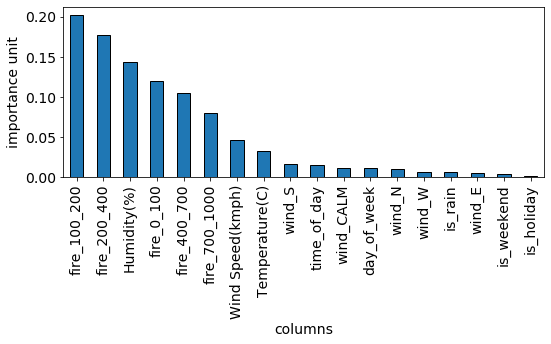

In [20]:
show_fea_imp(feat_imp,x_log=False, filename=None,title='')

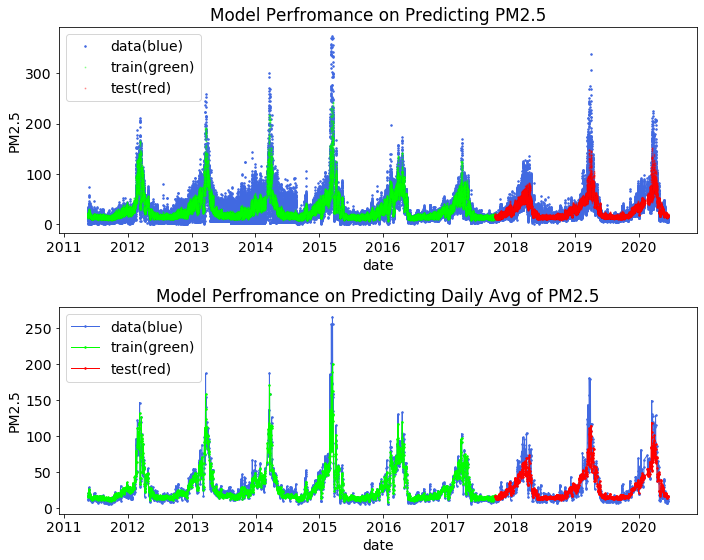

In [233]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=data, model=model, split_list=[0.7, 0.3], xlim=[], to_save=True)

In [346]:
# calculate the average error
trn_error = cal_error(data, model, data_index=data.split_list[0])

# resample
ytrn_pred_df_avg = trn_error.resample('d').mean().dropna()
cal_scores(ytrn_pred_df_avg['actual'].values, ytrn_pred_df_avg['pred'].values, header_str='avg_trn_')

{'avg_trn_r2_score': 0.9450132986667232,
 'avg_trn_mean_squared_error': 35.925725806931965,
 'avg_trn_mean_absolute_error': 3.7745352329778226}

In [347]:
# calculate the average error
ytest_pred_df = cal_error(data, model, data_index=data.split_list[1])

# resample
ytest_pred_df_avg = ytest_pred_df.resample('d').mean().dropna()
cal_scores(ytest_pred_df_avg['actual'].values, ytest_pred_df_avg['pred'].values, header_str='avg_test_')

{'avg_test_r2_score': 0.7828068417310021,
 'avg_test_mean_squared_error': 145.74247345984156,
 'avg_test_mean_absolute_error': 7.717591182233365}

## Average Error

Text(0.5, 1.0, 'error (by pollution season)')

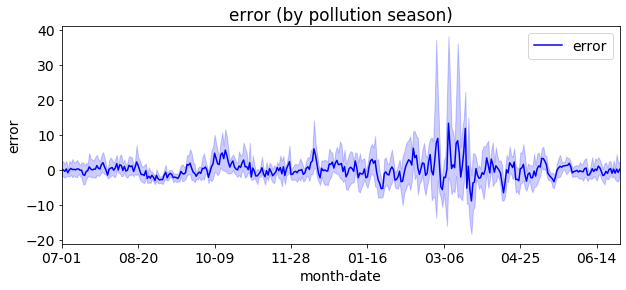

In [348]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(trn_error, 'error', ax, plot_error=True, roll=False, agg='mean')
ax.set_title('error (by pollution season)')

Text(0.5, 1.0, 'rmse (by pollution season)')

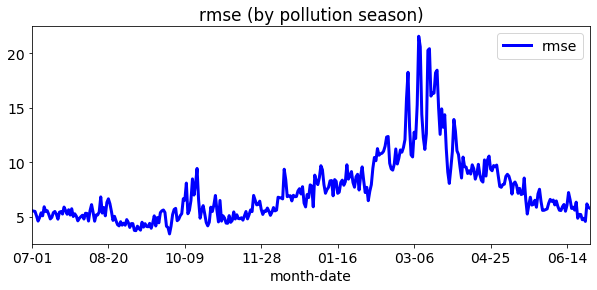

In [349]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(trn_error, 'rmse', ax, plot_error=False, roll=True, agg='mean')
ax.set_title('rmse (by pollution season)')

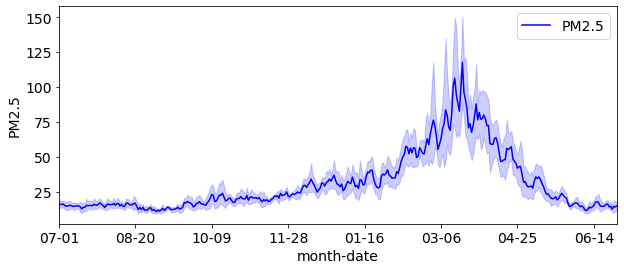

In [194]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(data.data, 'PM2.5', ax, plot_error=True, roll=False, agg='mean')

# Inference

In [21]:
inferer = Inferer(city_name='Chiang Mai', pollutant='PM2.5')

rolling_win 1
data no fire has shape (77747, 14)
raw model performance {'test_r2_score': 0.7122449924118716, 'test_mean_squared_error': 224.97967147940352, 'test_mean_absolute_error': 9.131018661099539}
daily avg training error {'avg_trn_r2_score': 0.9492851954528936, 'avg_trn_mean_squared_error': 33.138830210385116, 'avg_trn_mean_absolute_error': 3.566305657569526}
daily avg test error {'avg_test_r2_score': 0.7854894564576684, 'avg_test_mean_squared_error': 143.92828455217742, 'avg_test_mean_absolute_error': 7.610005328100918}
max error 16.704070280186716


In [22]:
inferer._get_data_sample(n_samples=100, step=1,day_err=10,hour_err=2)

obtaining inference samples. This will take about 20 mins


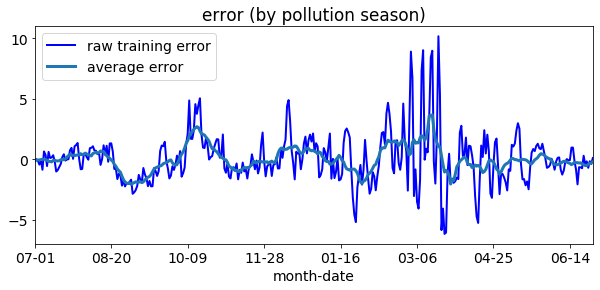

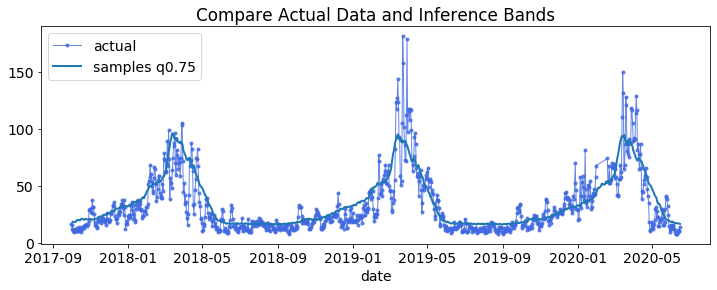

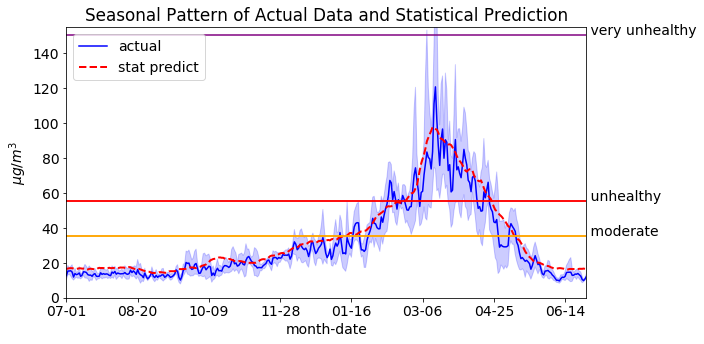

In [48]:
inferer.compare_inf_act()

In [33]:
sea_pred, data_senario = _reduct_effect_q(inferer.model, inferer.data_samples, ['fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_700'], inferer.sea_error, q=0.75, per_cut=0.5)

data_senario.head()

,Temperature(C),Humidity(%),Wind Speed(kmph),wind_CALM,wind_N,wind_S,wind_W,is_rain,is_holiday,is_weekend,...,is_rain_lag_43,is_holiday_lag_43,is_weekend_lag_43,day_of_week_lag_43,time_of_day_lag_43,fire_0_100_lag_43,fire_100_200_lag_43,fire_200_400_lag_43,fire_400_700_lag_43,fire_700_1000_lag_43
datetime,,,,,,,,,,,,,,,,,,,,,
2017-10-03 10:00:00,31.0,55.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.046512,0.0,0.209302,1.488372,11.44186,3.953488e-03,4.210052e-05,6.739711e-04,0.000328,0.000076
2017-10-03 10:00:00,26.0,83.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023256,0.0,0.209302,1.488372,11.44186,6.656134e-15,6.943034e-15,-1.283289e-14,0.000055,0.000509
2017-10-03 10:00:00,25.0,83.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.046512,0.0,0.209302,1.488372,11.44186,4.111628e-03,4.533902e-05,6.906493e-04,0.000325,0.000079
2017-10-03 10:00:00,27.0,70.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.209302,1.488372,11.44186,4.930387e-15,1.386006e-04,2.263236e-04,0.001807,0.001900
2017-10-03 10:00:00,24.0,89.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023256,0.0,0.209302,1.488372,11.44186,7.453199e-15,3.643190e-16,1.900702e-04,0.000213,0.000058


In [96]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


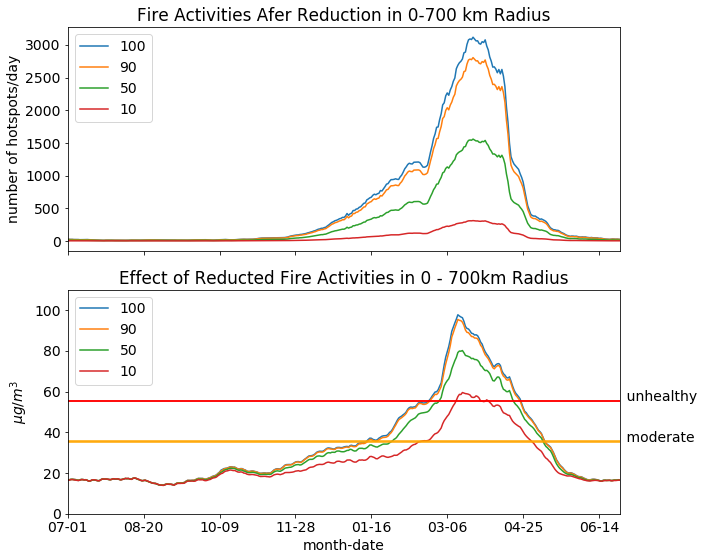

In [50]:
data = inferer.dataset
fire_hour = data.fire[data.fire['distance'] <= 700].copy()
fire_hour = data.fire[['count']].resample('d').sum()
col = ['number of hotspots']
fire_hour.columns = col
fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
sep_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
sep_fire = sep_fire.groupby('winter_day').mean()[col]
red_list = [0, 0.1, 0.5,  0.9]
red_fire = []
#colors = ['#1f77b4', '#2ca02c', '#9467bd', '#7f7f7f']
for per_cut in red_list:
    temp = sep_fire*(1-per_cut)
    temp.columns = [int(round(1-per_cut,2)*100)]
    red_fire.append(temp)
    
red_fire = pd.concat(red_fire, axis=1)

_, a = plt.subplots(2,1, figsize=(10,8),sharex=True)

ax = a[0]
red_fire.plot(ax=ax)
ax.legend(red_fire.columns, loc='upper left')
ax.set_title('Fire Activities Afer Reduction in 0-700 km Radius')
ax.set_xlim([red_fire.index.min(), red_fire.index.max()])
new_ticks = ['07-01', '08-20', '10-09', '11-28', '01-16', '03-06', '04-25', '06-14', '']    
ax.set_xticklabels(new_ticks)
ax.set_xlabel('month-date')
ax.set_ylabel('number of hotspots/day')

fea_effect = inferer.features_effect_season(features=['fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_700'], q=0.75, ax=a[1],red_list=[0, 0.1, 0.5, 0.9])
a[1].set_title('Effect of Reducted Fire Activities in 0 - 700km Radius')
plt.tight_layout()

plt.savefig(inferer.report_folder + 'effect_fire_0_700km_sea.png')


In [27]:
%%time

features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5]
zone_list = inferer.zone_list
feature_list = []
columns_list = []
for i in range(1,6):
    fea = features[:i]
    feature_list.append(fea)
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    
fea_effect_3m = inferer.features_effect_sum(feature_list, q=0.75, red_list=[0, 0.1, 0.25, 0.5, 0.75, 0.9], time_range=[185,305],agg='mean' )
fea_effect_3m.columns = columns_list


Wall time: 39min 49s
Parser   : 604 ms


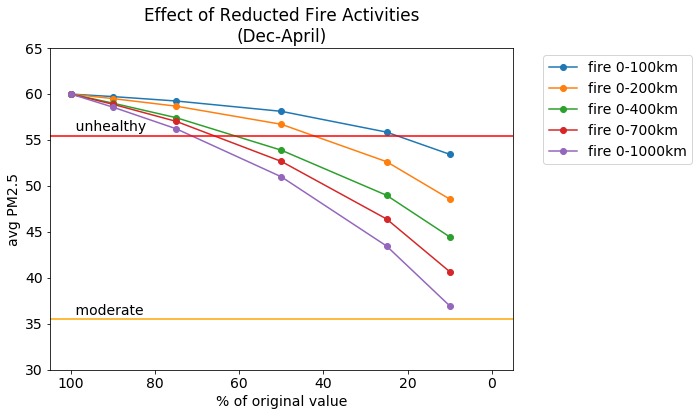

In [37]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reducted Fire Activities\n(Dec-April)")
columns_list = [fill(l,25) for l in fea_effect_3m.columns]
plt.plot(fea_effect_3m, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([30, 65])

for l, c in inferer.color_zip:
    plt.axhline(l, color=c)

plt.text(100, 36, ' moderate',  horizontalalignment='left')
plt.text(100, 56, ' unhealthy',  horizontalalignment='left')
plt.tight_layout()
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_3m.png')

In [29]:
%%time

features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5]
zone_list = inferer.zone_list
feature_list = []
columns_list = []
for i in range(1,6):
    fea = features[:i]
    feature_list.append(fea)
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    
fea_effect_mar = inferer.features_effect_sum(feature_list, q=0.75, red_list=[0, 0.1, 0.25, 0.5, 0.75, 0.9], time_range=[245,275],agg='mean' )


Wall time: 38min 25s


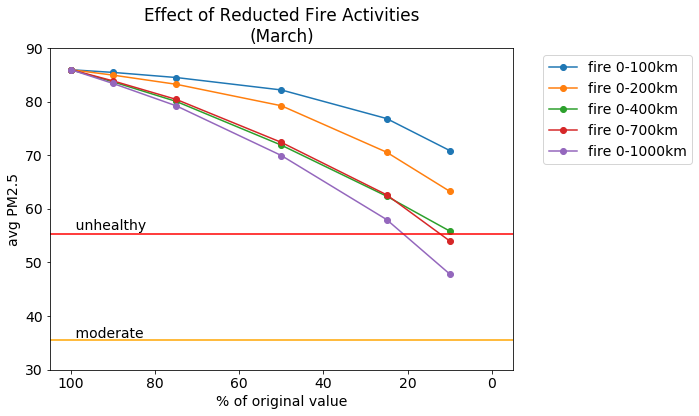

In [36]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reducted Fire Activities\n(March)")
columns_list = [fill(l,20) for l in fea_effect_3m.columns]
plt.plot(fea_effect_mar, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([30, 90])

for l, c in inferer.color_zip:
    plt.axhline(l, color=c)
plt.text(100, 36, ' moderate',  horizontalalignment='left')
plt.text(100, 56, ' unhealthy',  horizontalalignment='left')
plt.tight_layout()
    
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_mar.png')